This is the assignment for the UCL CASA module Data Science for Spatial Systems (CASA0006).

Data is here: https://www.kaggle.com/datasets/deepcontractor/smoke-detection-dataset/data

              
Code is here: https://github.com/MUD129/DataScience

# Fire warning based on smoke detector data

## 1.0 | Introduction
Fire is one of the most common disasters globally, causing huge human casualties and property damage every year (Kodur et al., 2019). Smoke alarms, as a key tool for early fire detection, play a crucial role in increasing survival rates and reducing fire damage. However, the high false alarm rate of smoke alarms has become a common problem, which not only leads to a huge economic waste, but also reduces people's trust in this life-safety device (Nesse, 2005). 

This project utilises advanced machine learning algorithms to develop an efficient smoke alarm prediction model by analysing smoke alarm data collected from different urban environments in order to improve the accuracy of smoke detection and reduce false alarm events, which in turn enhances public trust and reliance on alarms. 



## 2.0 |Literature review

Smoke alarms play a vital role in improving fire safety, significantly reducing fire-related risks and damage. However, with the popularity of smoke alarms has come a major problem: an increase in false alarms. False alarms not only increase the financial burden on public resources, but also erode public trust in fire alarm systems (Isrorudin et al., 2022). The National Fire Protection Association (NFPA) reports that in the United States, the number of false alarms is roughly twice the number of actual fire incidents, resulting in significant unnecessary expenditures (Ahrens, 2017). 

Alarms are often highly sensitive in order to improve warning capabilities, but also bring public distress, with some residents disabling their smoke alarms as a result, which poses a significant risk during actual fire events (Nesse, 2005). To address the challenges posed by false alarms, research has focussed on the integration of advanced technologies and machine learning algorithms into smoke alarms to improve their accuracy and effectively differentiate between smoke signatures from fire and non-fire related sources (Cestari et al., 2005).

## 3.0 |Research question

In the smoke alarm dataset, which machine learning method is most effective at predicting the correct trigger conditions for smoke alarms, and how can the accuracy and efficiency of fire response be improved by improving the model to reduce false alarm rates?

## 4.0 | Presentation of data

This dataset contains nearly 60,000+ sensor readings from IoT smoke alarm devices in different urban environments. The dataset focuses on residential and commercial areas of the city and covers a diverse range of environments and fire source scenarios including normal indoor and outdoor environments, indoor and outdoor fire sources such as firewood and gas, and specific conditions such as outdoor high humidity environments. 

By simulating a variety of fires and everyday environments in a city, the dataset is designed to train alarm systems that can accurately identify and differentiate between fire smoke and other sources of false alarms. This kind of comprehensive data collection and analysis is critical to improving urban safety and can significantly improve the accuracy and reduce the false alarm rate of smoke detectors.

In [1]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings('ignore')
import pandas as pd

url = 'https://raw.githubusercontent.com/MUD129/DataScience/main/smoke_detection_iot.csv'
df = pd.read_csv(url, encoding='utf-8')

df

,Unnamed: 0,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
0,0,1654733331,20.000,57.36,0,400,12306,18520,939.735,0.00,0.00,0.00,0.000,0.000,0,0
1,1,1654733332,20.015,56.67,0,400,12345,18651,939.744,0.00,0.00,0.00,0.000,0.000,1,0
2,2,1654733333,20.029,55.96,0,400,12374,18764,939.738,0.00,0.00,0.00,0.000,0.000,2,0
3,3,1654733334,20.044,55.28,0,400,12390,18849,939.736,0.00,0.00,0.00,0.000,0.000,3,0
4,4,1654733335,20.059,54.69,0,400,12403,18921,939.744,0.00,0.00,0.00,0.000,0.000,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62625,62625,1655130047,18.438,15.79,625,400,13723,20569,936.670,0.63,0.65,4.32,0.673,0.015,5739,0
62626,62626,1655130048,18.653,15.87,612,400,13731,20588,936.678,0.61,0.63,4.18,0.652,0.015,5740,0
62627,62627,1655130049,18.867,15.84,627,400,13725,20582,936.687,0.57,0.60,3.95,0.617,0.014,5741,0
62628,62628,1655130050,19.083,16.04,638,400,13712,20566,936.680,0.57,0.59,3.92,0.611,0.014,5742,0


### ***Features:***
UTC: Time for experiment
Temperature[C]: Temperature of surroundings
Humidity[%]: Air humidity
TVOC[ppb]: Total Volatile Organic Compounds, measured in ppb
eCO2[ppm]: CO2 equivalent concentration, measured in ppm
Raw H2: The amount of Raw Hydrogen in surroundings
Raw Ethanol: The amount of Raw Ethanol present in surroundings
Pressure[hPa]: Air pressure, Measured in hPa
PM1.0: Paticulate matter of diameter less than 1.0 micrometer
PM2.5: Paticulate matter of diameter less than 2.5 micrometer
NC0.5: Concentration of particulate matter of diameter less than 0.5 micrometer
NC1.0: Concentration of particulate matter of diameter less than 1.0 micrometer
NC2.5: Concentration of particulate matter of diameter less than 2.5 micrometer
CNT: Sample Count. Fire Alarm(Reality) If fire was present then value is 1 else it is 0
Fire Alarm: 1 means Positive and 0 means Not Positiveh is "1" if a fire is there^1

### Data cleaning:

The first column in the dataset as well as the UTC are labelled for the data, the CNT is set to check only for missing data, these variables do not help to train the model so they are deleted first.

In [2]:
df = df.drop(df.columns[[0]], axis=1) 
df = df.drop(columns=['UTC'])
df = df.drop(columns=['CNT'])
df

,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,Fire Alarm
0,20.000,57.36,0,400,12306,18520,939.735,0.00,0.00,0.00,0.000,0.000,0
1,20.015,56.67,0,400,12345,18651,939.744,0.00,0.00,0.00,0.000,0.000,0
2,20.029,55.96,0,400,12374,18764,939.738,0.00,0.00,0.00,0.000,0.000,0
3,20.044,55.28,0,400,12390,18849,939.736,0.00,0.00,0.00,0.000,0.000,0
4,20.059,54.69,0,400,12403,18921,939.744,0.00,0.00,0.00,0.000,0.000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
62625,18.438,15.79,625,400,13723,20569,936.670,0.63,0.65,4.32,0.673,0.015,0
62626,18.653,15.87,612,400,13731,20588,936.678,0.61,0.63,4.18,0.652,0.015,0
62627,18.867,15.84,627,400,13725,20582,936.687,0.57,0.60,3.95,0.617,0.014,0
62628,19.083,16.04,638,400,13712,20566,936.680,0.57,0.59,3.92,0.611,0.014,0


### Data exploration:

By examining the information in the dataframe, we can see that all 62,630 rows of data are complete, there are no missing values, and the data types are all integers or floats.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62630 entries, 0 to 62629
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Temperature[C]  62630 non-null  float64
 1   Humidity[%]     62630 non-null  float64
 2   TVOC[ppb]       62630 non-null  int64  
 3   eCO2[ppm]       62630 non-null  int64  
 4   Raw H2          62630 non-null  int64  
 5   Raw Ethanol     62630 non-null  int64  
 6   Pressure[hPa]   62630 non-null  float64
 7   PM1.0           62630 non-null  float64
 8   PM2.5           62630 non-null  float64
 9   NC0.5           62630 non-null  float64
 10  NC1.0           62630 non-null  float64
 11  NC2.5           62630 non-null  float64
 12  Fire Alarm      62630 non-null  int64  
dtypes: float64(8), int64(5)
memory usage: 6.2 MB


In [4]:
df.describe()

,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,Fire Alarm
count,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000
mean,15.970424,48.539499,1942.057528,670.021044,12942.453936,19754.257912,938.627649,100.594309,184.467770,491.463608,203.586487,80.049042,0.714626
std,14.359576,8.865367,7811.589055,1905.885439,272.464305,609.513156,1.331344,922.524245,1976.305615,4265.661251,2214.738556,1083.383189,0.451596
min,-22.010000,10.740000,0.000000,400.000000,10668.000000,15317.000000,930.852000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,10.994250,47.530000,130.000000,400.000000,12830.000000,19435.000000,938.700000,1.280000,1.340000,8.820000,1.384000,0.033000,0.000000
50%,20.130000,50.150000,981.000000,400.000000,12924.000000,19501.000000,938.816000,1.810000,1.880000,12.450000,1.943000,0.044000,1.000000
75%,25.409500,53.240000,1189.000000,438.000000,13109.000000,20078.000000,939.418000,2.090000,2.180000,14.420000,2.249000,0.051000,1.000000
max,59.930000,75.200000,60000.000000,60000.000000,13803.000000,21410.000000,939.861000,14333.690000,45432.260000,61482.030000,51914.680000,30026.438000,1.000000


<Figure size 5000x4000 with 0 Axes>

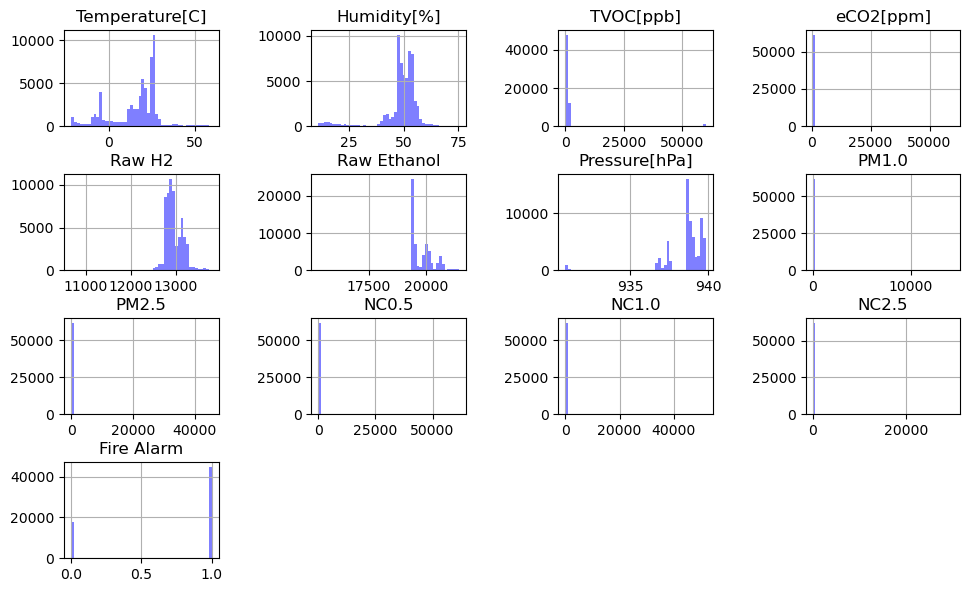

In [5]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
plt.figure(figsize=(50, 40)) 
df.hist(color='blue', alpha=0.5, bins=50)
# Adjusting subgraph spacing
plt.tight_layout()
plt.subplots_adjust(left=0.3, bottom=0.3, right=1.7, top=1.4, wspace=0.6, hspace=0.5)
# plot
plt.show()

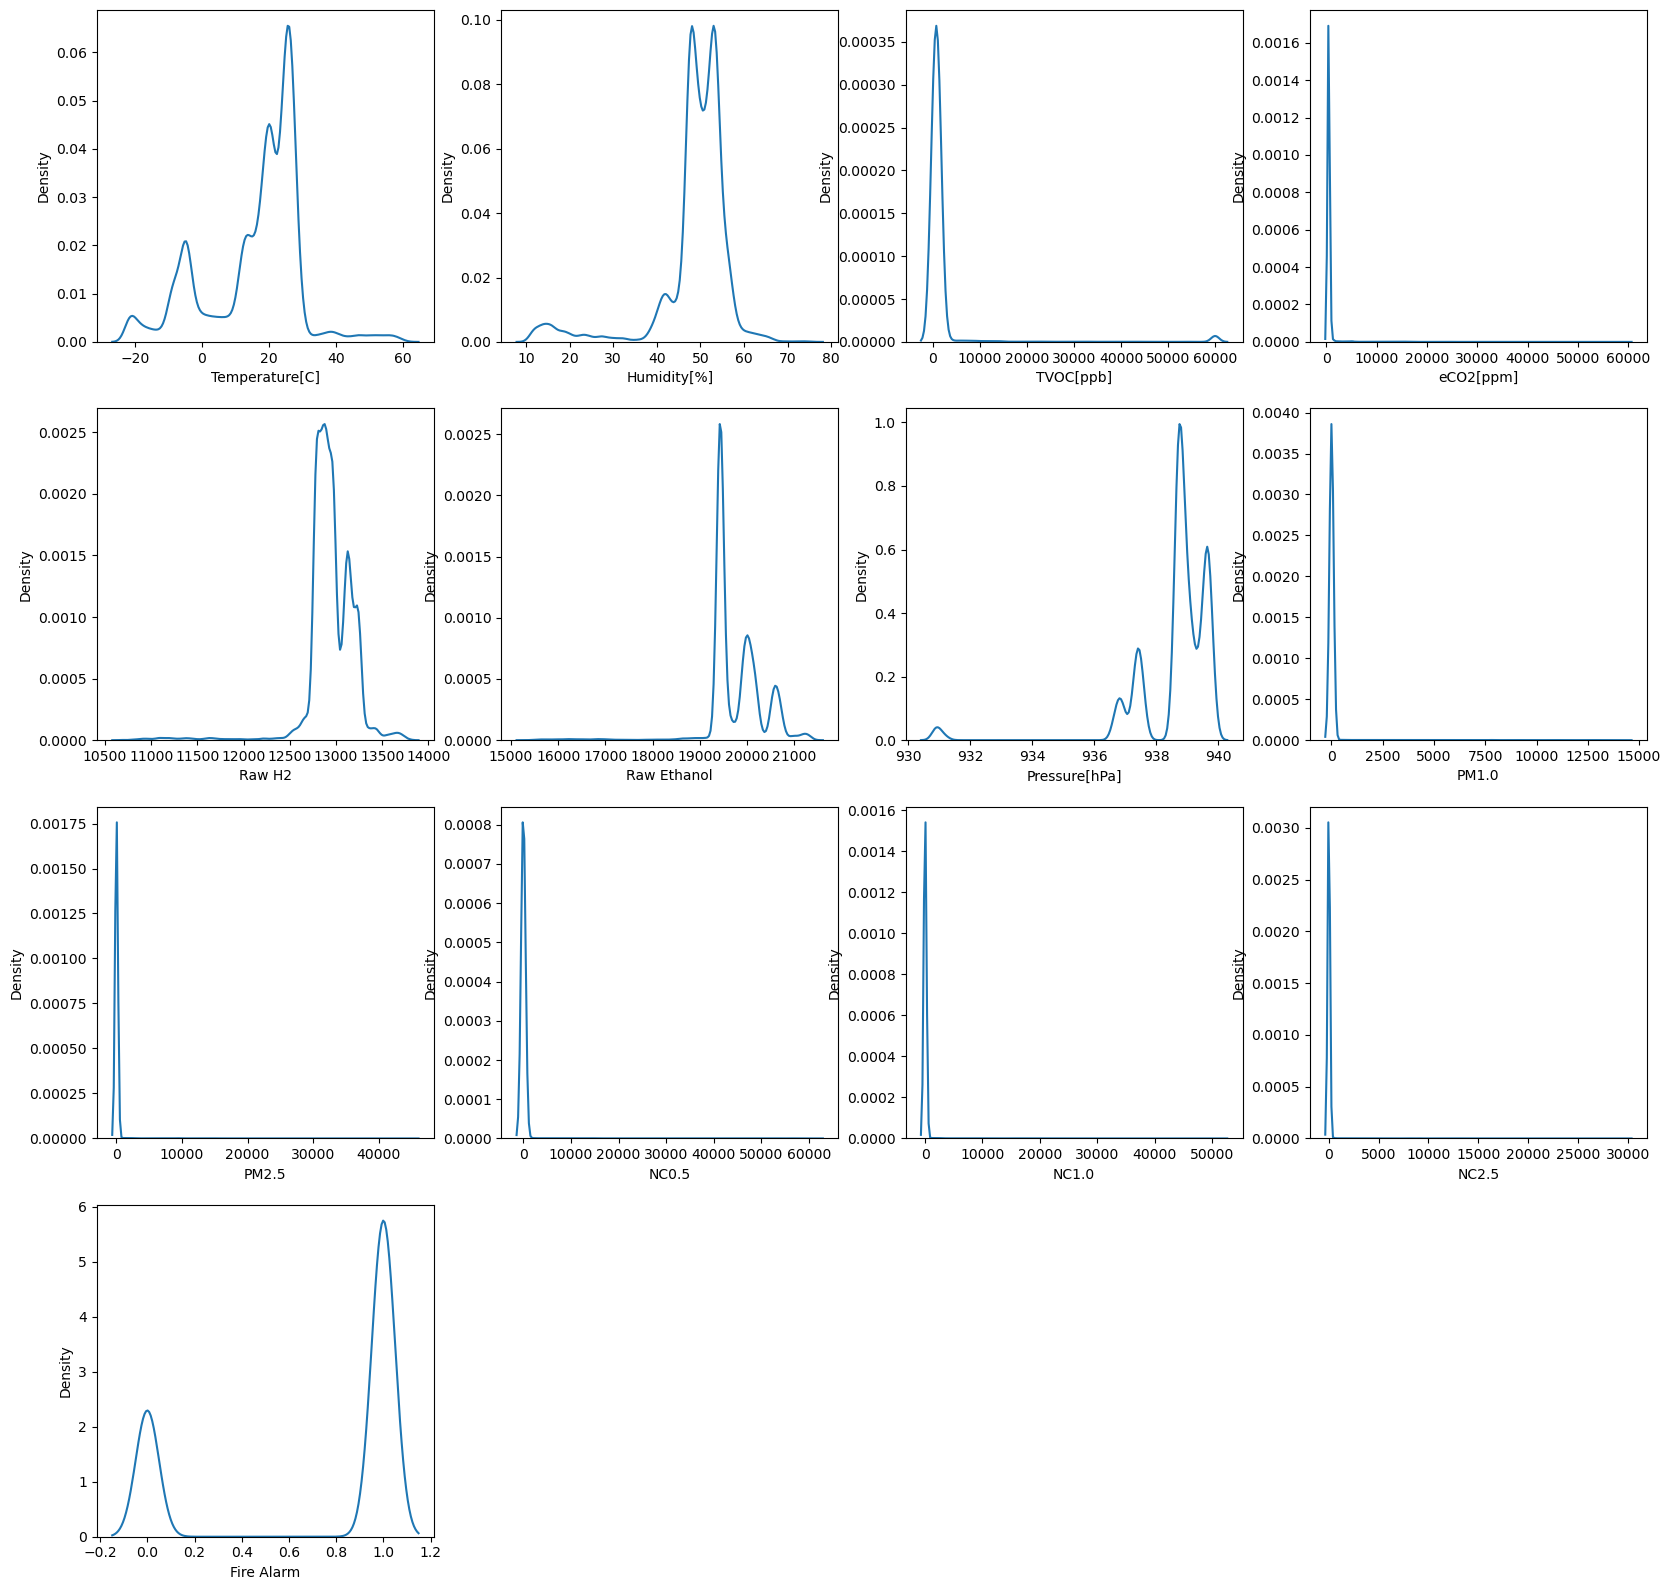

In [6]:
plt.figure(figsize=(20,25))
i=1
for col in df.columns:
    plt.subplot(5,4,i)
    sns.kdeplot(df[col])
    i+=1

By looking at the profile of the data, we can see that it shows a wide range of temperatures, ranging from -22.01°C to 59.93°C. Implying that the distribution of their readings is more spread out. Descriptive statistics provide a view of the distribution and variability of the data, which is essential for subsequent data preprocessing and model selection. Particularly for features with extreme data ranges, special normalisation may be required. 

The histograms illustrate the distribution of data from various environmental sensors, with temperature and humidity data relatively concentrated.TVOC and eCO2 concentrations tend to be concentrated at lower values, but also exhibit some extreme values reflecting anomalies. Some combustible gases such as hydrogen and ethanol, as well as particulate sensor data show large fluctuations, suggesting that different levels of combustible substances or particulate matter may be present in different environments, with strong correlation to eventual fire forecasting.

***Outlier Detection***

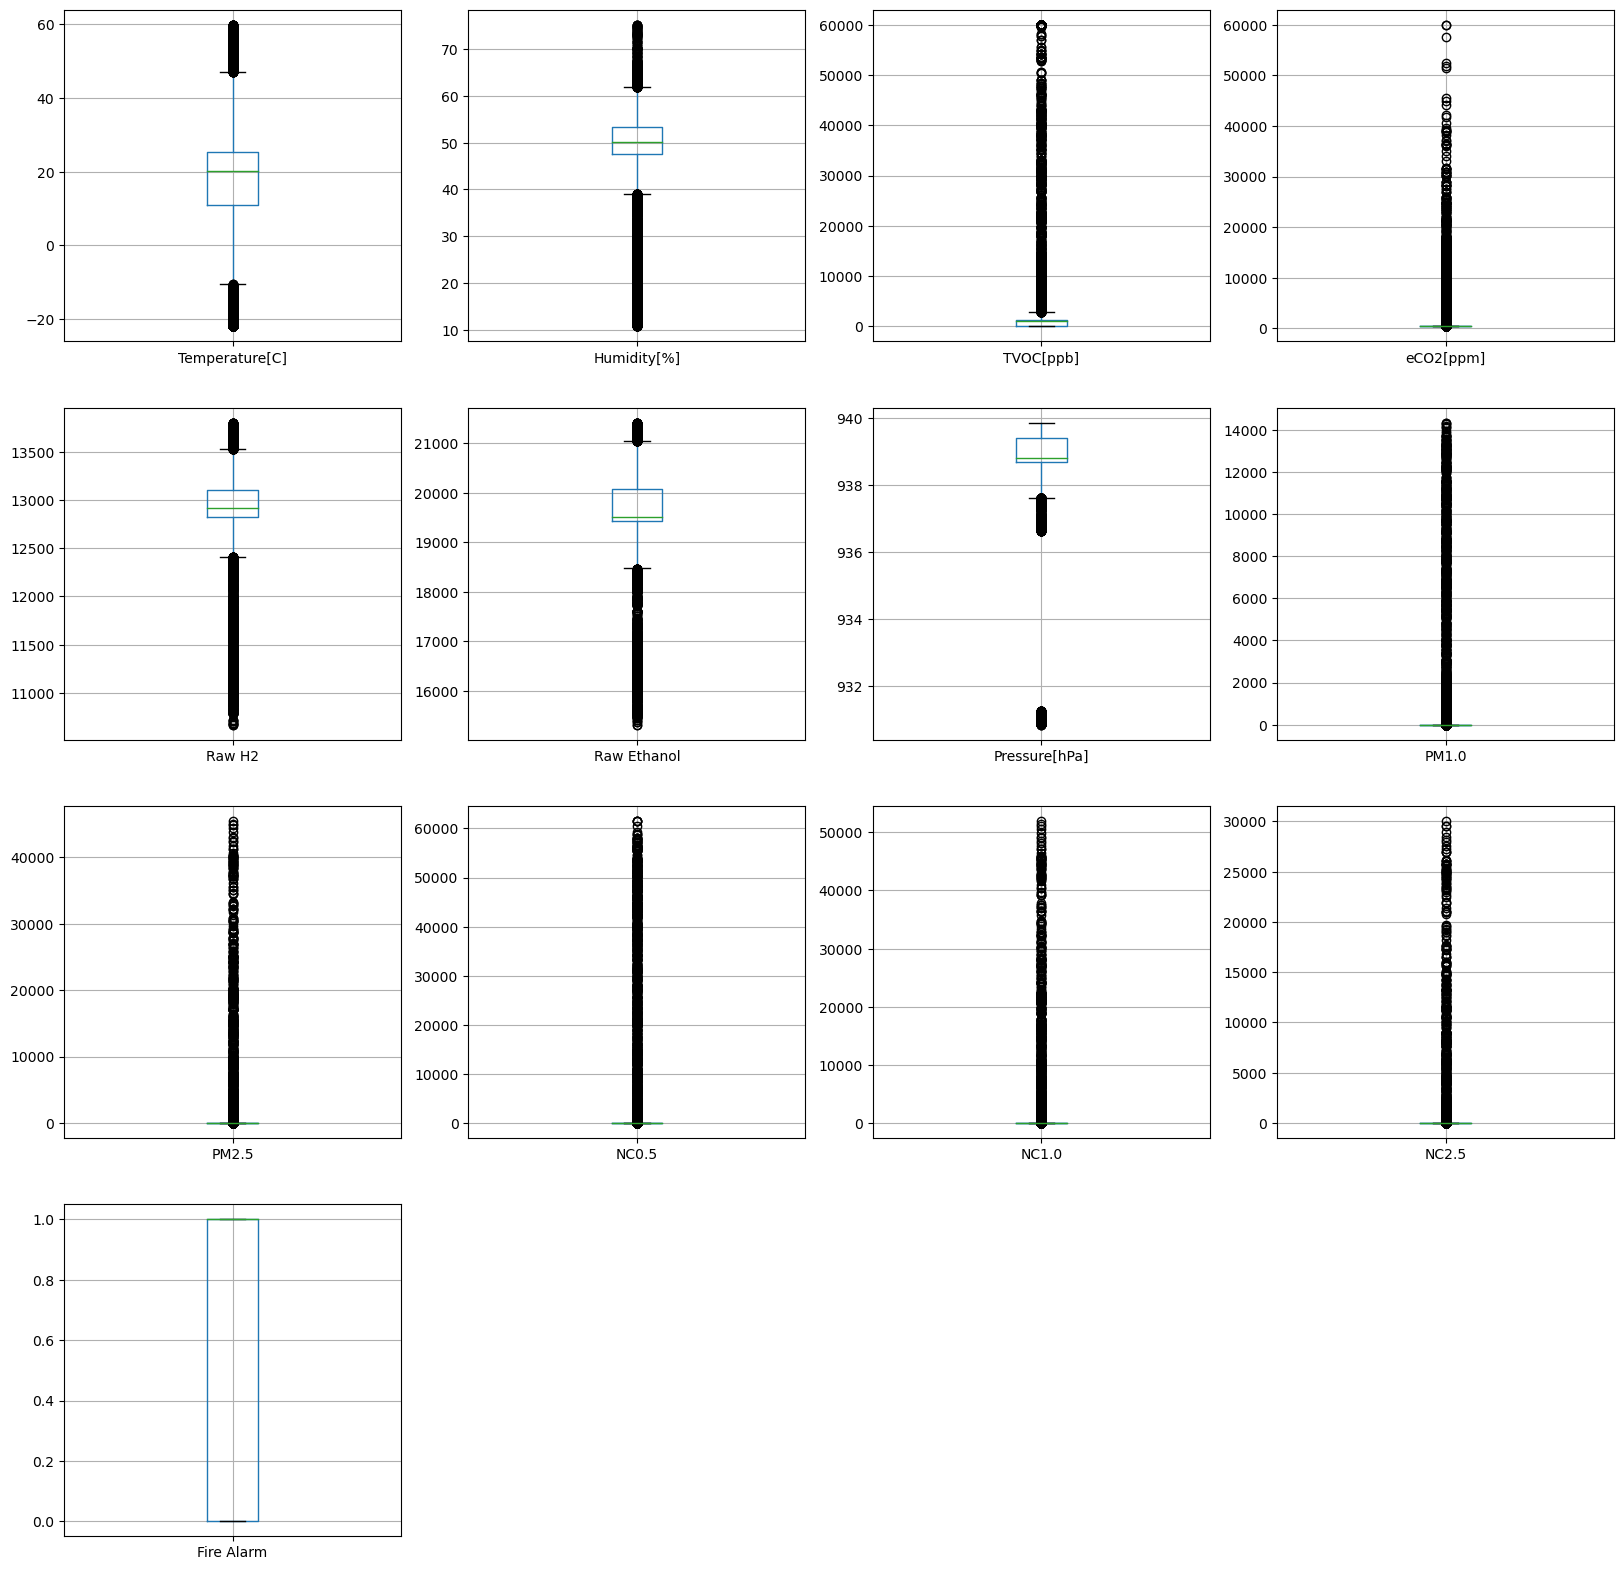

In [7]:
plt.figure(figsize=(20,25))
i=1
for col in df.columns:
    plt.subplot(5,4,i)
    df[[col]].boxplot()
    i+=1

Outliers: Many of the parameters, such as TVOC, eCO2, PM1.0, NC0.5, and NC2.5, show a large number of outliers that are far from the interquartile range.

DATA DISTRIBUTION: For temperature and humidity, the data looks relatively concentrated without many extreme outliers. In contrast, the data for parameters such as TVOC and eCO2 are more widely distributed and have more outliers.。

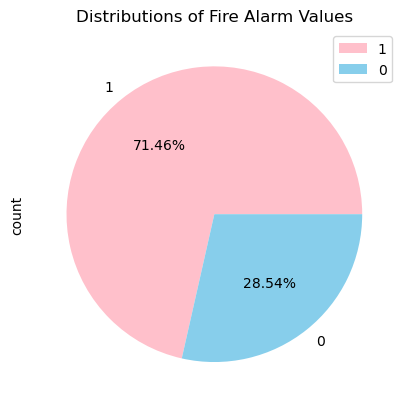

In [8]:
color = ['pink', 'skyblue']
df['Fire Alarm'].value_counts().plot.pie(colors = color, autopct = "%.2f%%")
plt.title("Distributions of Fire Alarm Values")
plt.legend()
plt.show()

Balance:
In the dataset, category 1 has quite a few more samples than category 0 (about a little more than twice as many as category 0). This indicates that the dataset is unbalanced. The data imbalance may affect the learning process of the machine learning model, causing the model to make better predictions for the majority of categories and poor predictions for the minority of categories.


***Relevant Matrix***

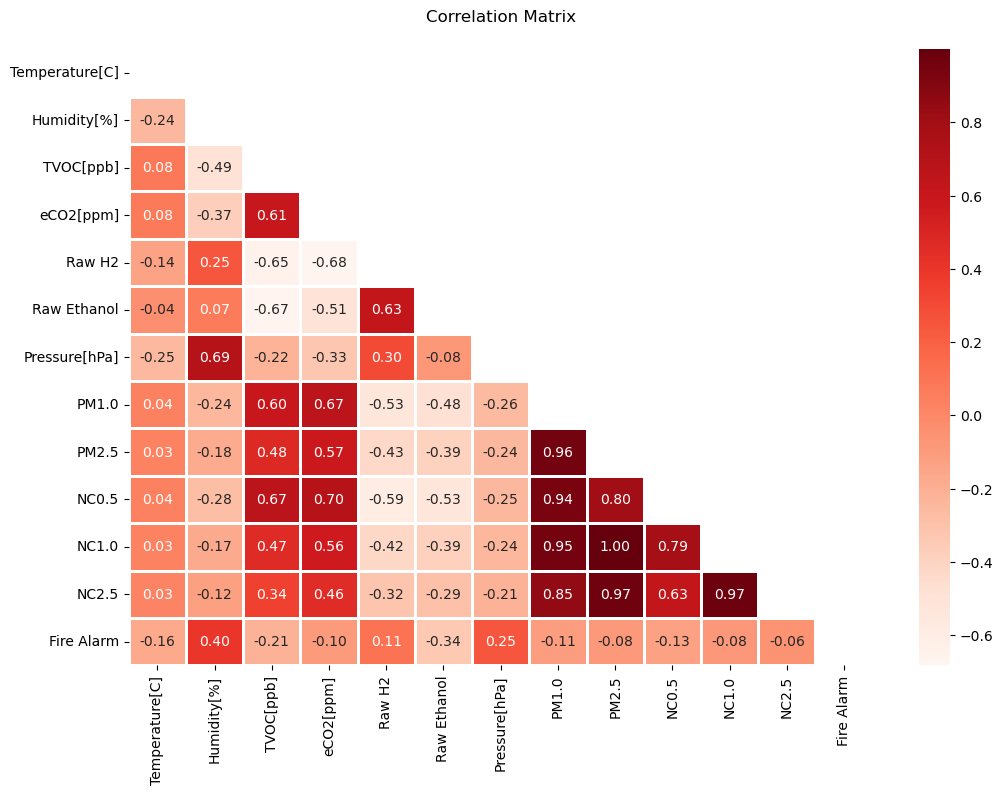

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize = (12,8))
corr = df.corr()
# create a mask
mask = np.triu(np.ones_like(corr, dtype=bool))
# Use the Reds palette to indicate correlation, with dark red indicating a high positive correlation, and light red indicating a low or negative correlation
cormat = sns.heatmap(corr, mask=mask, annot=True, cmap='Reds', linewidths=1, fmt=".2f")
cormat.set_title('Correlation Matrix', pad=20)
plt.show()

The correlation matrix shows the correlation coefficients between different features in the dataset. A positive number close to 1 indicates that two features have a strong positive correlation, while a coefficient close to 0 indicates that there is no significant linear relationship between the two features. 

Humidity and Pressure show a moderate positive correlation (0.69) under which pressure can increase as humidity increases.
eCO2 has a relatively high positive correlation (0.61) with TVOC, meaning that the higher the concentration of TVOC in indoor air, the higher the eCO2 concentration.

## 4.0 |Methodology

The final prediction in the dataset, the "Fire Alarm" column, is a binary variable (0 or 1) indicating the state of not having a fire alarm or having a fire alarm. This is a typical classification problem. I decided to choose classification algorithms such as Logistic Regression, Random Forests or Neural Networks as these algorithms are suitable for dealing with classification problems.

***Logistic Regression***

Logistic regression is one of the standard methods for dealing with binary classification problems (LaValley, 2008). It predicts the probability of the target variable, ranging from 0 to 1, and is implemented through a logistic function that can naturally handle binary classification problems. The training process of the model consists of estimating the optimal weights that allow the model to best predict the category labels.

***Random Forests***

Random Forests is an integrated learning method for classification and regression problems, especially when dealing with complex data structures containing a large number of features and complex data structures (Breiman, 2001). Random Forest improves the accuracy and stability of the model by building multiple decision trees and aggregating their predictions, thus reducing the risk of overfitting. In the random forest algorithm, each tree is trained on a random subsample of the data set. When making category predictions, each tree will give a prediction and Random Forest will use majority voting or average probability to decide the final classification result. This approach not only improves the generalisation ability of the model, but also allows the model to capture the diversity and complexity in the data.

***Neural Networks***

Neural networks are a powerful machine learning technique that can model complex non-linear relationships. For classification problems, especially when the data relationships are complex or the feature dimensions are high, neural networks can provide higher flexibility and learning capabilities (Anderson, 1995).
A neural network consists of multiple layers of neurons, each of which receives an input, performs a weighted summation, and generates an output through a nonlinear activation function. Each layer of the network learns a different representation of the data, and deeper networks are able to capture more complex patterns, minimising the discrepancy between predicted and true labels.

In this paper, we start with simple logistic regression and then consider more complex models (e.g., neural networks) if they don't work well. Each model has its advantages and disadvantages, and the process will evaluate the performance of different models through ROC curves and select the best solution.

In [10]:

from sklearn.model_selection import train_test_split
X = df.drop('Fire Alarm',axis =1)
y = df['Fire Alarm']

### Logistic Regression ###
The "Fire Alarm" column was used as the target variable, the remaining columns were used as features, and the dataset was split into a 70 per cent training set and a 30 per cent test set, with the random seed set to 2024 to ensure that the results were repeatable. A logistic regression model was then created and trained and used to predict the results on the test set.

The code then used these predictions to generate the true and false positive rates required for the ROC curve and to calculate the area under the curve (AUC), with AUC values closer to 1 indicating better model performance. The ROC curves are plotted to demonstrate the model's ability to distinguish between positive and negative classes.
Finally, the code visualises the model's predictions, i.e. actual versus predicted labels, through a confusion matrix.

In [11]:
x_train, x_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=2024)

In [12]:
x_train

,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5
29759,22.390,48.04,35,400,13258,20189,939.655,2.28,2.36,15.66,2.443,0.055
43282,24.620,53.20,1155,410,12905,19439,938.688,1.77,1.84,12.16,1.896,0.043
29086,22.090,48.95,128,400,13220,20094,939.636,1.97,2.04,13.53,2.109,0.048
15785,11.997,50.44,1120,410,12883,19460,938.808,1.99,2.07,13.73,2.141,0.048
24406,-4.116,53.36,1325,413,12981,19393,938.804,1.65,1.72,11.38,1.774,0.040
...,...,...,...,...,...,...,...,...,...,...,...,...
47643,27.020,47.59,1348,406,12969,19393,938.748,2.06,2.14,14.18,2.212,0.050
35456,25.140,52.74,858,657,12798,19521,939.116,2.01,2.09,13.85,2.159,0.049
51808,26.630,45.88,80,463,12792,20677,937.491,2.30,2.39,15.84,2.470,0.056
52730,28.240,43.64,89,400,12786,20632,937.430,1.88,1.95,12.92,2.015,0.046


In [13]:
y_train

29759    1
43282    1
29086    1
15785    1
24406    1
        ..
47643    1
35456    1
51808    0
52730    0
7816     1
Name: Fire Alarm, Length: 43841, dtype: int64

auc:
0.8088290888341391


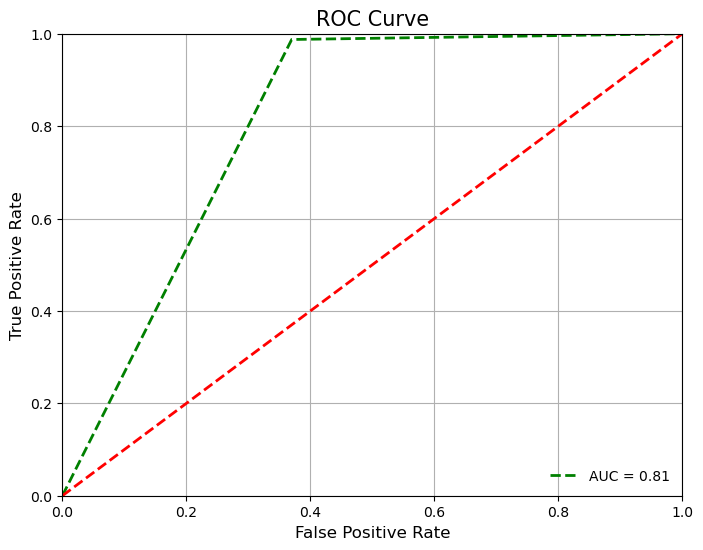

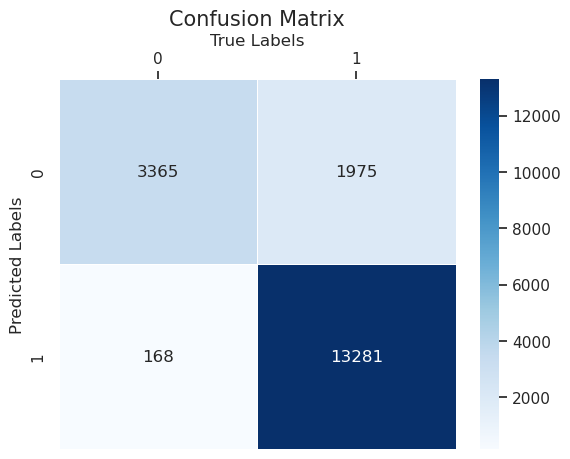

In [14]:
lr = LogisticRegression(solver='lbfgs')
# model training
lr.fit(x_train, y_train)

# predict
resu = lr.predict(x_val)
# calculate 
fpr, tpr, threshold = roc_curve(y_val, resu)
# auc
rocauc = auc(fpr, tpr)
print('auc:')
print(rocauc)
# Draw ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='green', linestyle='--', label='AUC = %0.2f' % rocauc, linewidth=2)
plt.legend(loc='lower right', frameon=False)
plt.plot([0, 1], [0, 1], 'r--', linewidth=2)
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate', fontsize=12)
plt.xlabel('False Positive Rate', fontsize=12)
plt.title('ROC Curve', fontsize=15)
plt.grid(True)
plt.show()

# heat map
sns.set()
f,ax=plt.subplots()

c = confusion_matrix(y_val, resu, labels=[0,1])
sns.heatmap(c, annot=True, ax=ax, cmap='Blues', fmt='g', linewidths=0.5)
ax.set_title('Confusion Matrix', fontsize=15)  
ax.set_xlabel('True Labels', fontsize=12)  
ax.set_ylabel('Predicted Labels', fontsize=12)  

ax.xaxis.set_label_position('top')
ax.xaxis.tick_top()

plt.show()

In [15]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

# validation
resu = lr.predict(x_val)

# acc
accuracy = accuracy_score(y_val, resu)
print(f'Accuracy: {accuracy:.2f}')

# recall
recall = recall_score(y_val, resu)
print(f'Recall: {recall:.2f}')

# precision
precision = precision_score(y_val, resu)
print(f'Precision: {precision:.2f}')

# F1
f1 = f1_score(y_val, resu)
print(f'F1 Score: {f1:.2f}')


Accuracy: 0.89
Recall: 0.99
Precision: 0.87
F1 Score: 0.93


These values indicate that the model performs reasonably well in predicting positive classes, but there are a certain number of negative classes that are incorrectly classified as positive. A very high recall is a positive sign, especially in fire detection.

<Axes: ylabel='Feature'>

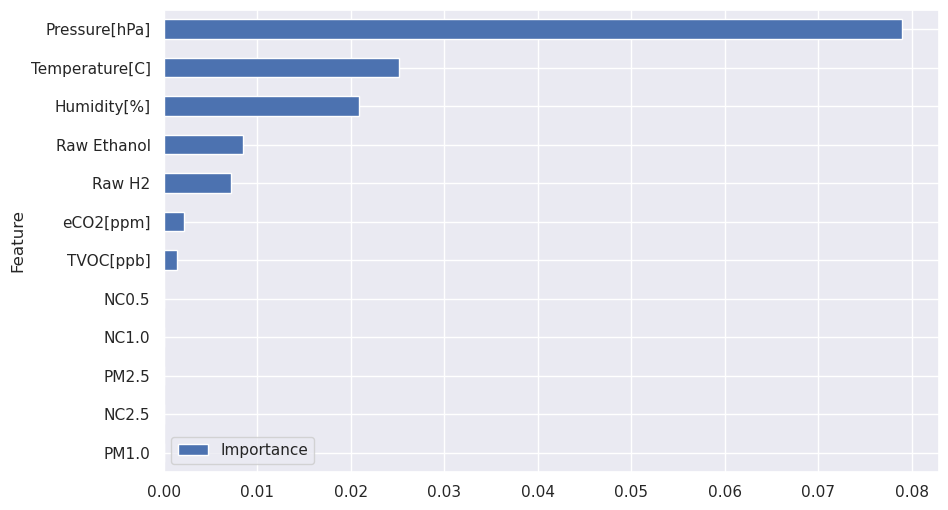

In [16]:
coefficients = lr.coef_[0]

feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': np.abs(coefficients)})
feature_importance = feature_importance.sort_values('Importance', ascending=True)
feature_importance.plot(x='Feature', y='Importance', kind='barh', figsize=(10, 6))

The importance of features is measured by the absolute value of the logistic regression coefficients, with the magnitude of the coefficients indicating the influence of the feature in the model. Pressure and temperature  contribute the most to the model's predictions, implying that they play the most critical role in predicting the target variable (e.g., whether a fire will be triggered). In contrast, other features had less influence on the model.

***Data normalisation*** is the process of scaling the data so that it falls into a small specific interval. The standardisation method I use is z-score standardisation, which means subtracting the mean of each feature and dividing by the standard deviation. This method helps to eliminate the effects of different scales and makes the features more comparable to each other.
In machine learning, normalisation can improve algorithm performance, especially for algorithms that require gradient descent (such as logistic regression and neural networks), as they both assume that all features are centred on 0 and have the same dispersion.

In [17]:
from sklearn.model_selection import train_test_split
X = df.iloc[:,0:12]
y = df.iloc[:,12]
X=(X-X.mean())/X.std()
X

,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5
0,0.280619,0.994939,-0.248612,-0.141677,-2.335917,-2.024990,0.831754,-0.109042,-0.093340,-0.115214,-0.091923,-0.073888
1,0.281664,0.917108,-0.248612,-0.141677,-2.192779,-1.810064,0.838514,-0.109042,-0.093340,-0.115214,-0.091923,-0.073888
2,0.282639,0.837021,-0.248612,-0.141677,-2.086343,-1.624670,0.834008,-0.109042,-0.093340,-0.115214,-0.091923,-0.073888
3,0.283684,0.760318,-0.248612,-0.141677,-2.027619,-1.485215,0.832505,-0.109042,-0.093340,-0.115214,-0.091923,-0.073888
4,0.284728,0.693767,-0.248612,-0.141677,-1.979907,-1.367088,0.838514,-0.109042,-0.093340,-0.115214,-0.091923,-0.073888
...,...,...,...,...,...,...,...,...,...,...,...,...
62625,0.171842,-3.694094,-0.168603,-0.141677,2.864764,1.336710,-1.470431,-0.108360,-0.093011,-0.114201,-0.091620,-0.073874
62626,0.186814,-3.685070,-0.170267,-0.141677,2.894126,1.367882,-1.464422,-0.108381,-0.093021,-0.114234,-0.091629,-0.073874
62627,0.201717,-3.688454,-0.168347,-0.141677,2.872105,1.358038,-1.457662,-0.108425,-0.093036,-0.114288,-0.091645,-0.073875
62628,0.216760,-3.665894,-0.166939,-0.141677,2.824392,1.331788,-1.462920,-0.108425,-0.093041,-0.114295,-0.091648,-0.073875


In [18]:
from sklearn.model_selection import train_test_split
X = X
#use the new dataframe

In [19]:
x_train, x_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=2024)

auc:
0.8560395242618597


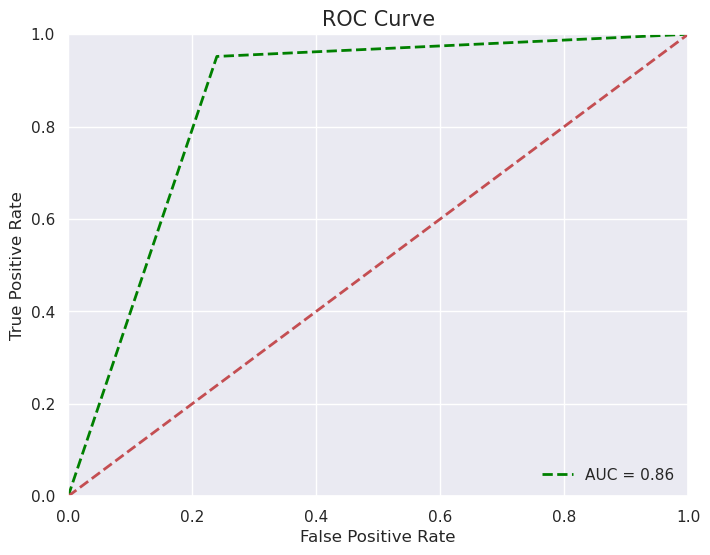

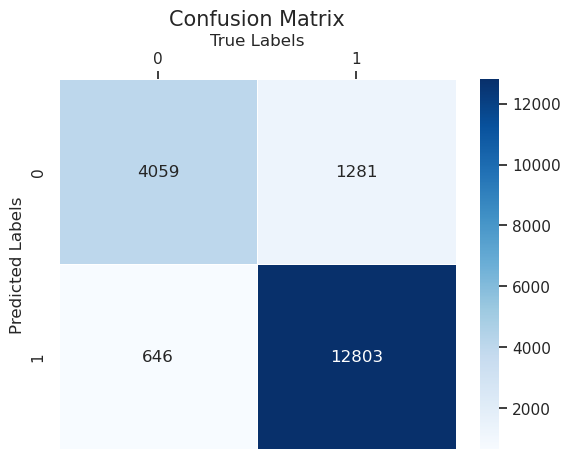

Accuracy: 0.90
Recall: 0.95
Precision: 0.91
F1 Score: 0.93


In [20]:
lr = LogisticRegression(solver='lbfgs')
lr.fit(x_train, y_train)
resu = lr.predict(x_val)
fpr, tpr, threshold = roc_curve(y_val, resu)
# auc
rocauc = auc(fpr, tpr)

print('auc:')
print(rocauc)

# Draw ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='green', linestyle='--', label='AUC = %0.2f' % rocauc, linewidth=2)
plt.legend(loc='lower right', frameon=False)
plt.plot([0, 1], [0, 1], 'r--', linewidth=2)
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate', fontsize=12)
plt.xlabel('False Positive Rate', fontsize=12)
plt.title('ROC Curve', fontsize=15)
plt.grid(True)
plt.show()

# heatmap
sns.set()
f,ax=plt.subplots()

c = confusion_matrix(y_val, resu, labels=[0,1])
sns.heatmap(c, annot=True, ax=ax, cmap='Blues', fmt='g', linewidths=0.5)

ax.set_title('Confusion Matrix', fontsize=15)  
ax.set_xlabel('True Labels', fontsize=12)  
ax.set_ylabel('Predicted Labels', fontsize=12) 

ax.xaxis.set_label_position('top')
ax.xaxis.tick_top()

plt.show()
resu = lr.predict(x_val)

accuracy = accuracy_score(y_val, resu)
print(f'Accuracy: {accuracy:.2f}')

recall = recall_score(y_val, resu)
print(f'Recall: {recall:.2f}')

precision = precision_score(y_val, resu)
print(f'Precision: {precision:.2f}')

f1 = f1_score(y_val, resu)
print(f'F1 Score: {f1:.2f}')

The overall accuracy of the model has increased, but at the same time the false alarm rate has also increased.

### GBDT and LR ###
The logistic regression just used belongs to the generalised linear model, which is limited by the expression ability and needs to deal with continuous variables discretely. After that, I used the gradient boosting decision tree algorithm suitable for handling continuous variables for feature combination, and a specific feature combination model is given.

In the feature combination model, X represents the data samples, and n decision trees will be generated by the gradient boosting decision tree algorithm. For each sample, a specific leaf node will be reached, which returns a one-hot vector, and the combined features can be obtained by combining all one-hot vectors of that sample in other decision trees, which successfully converts continuous variables into discrete variables (Zhang& Jung, 2020).
Through the transformation of the original data processing, two different forms of data samples, feature combination and non-feature combination, are obtained, and the accuracy of the final model is greatly improved, and the model accuracy reaches almost 100%.


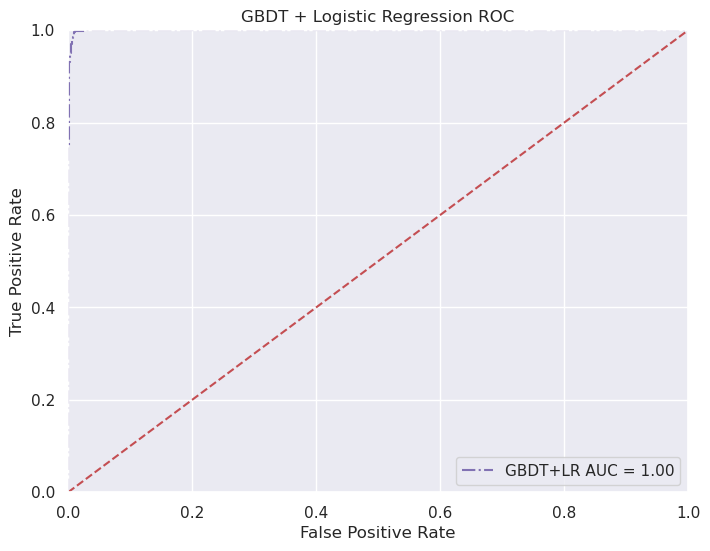

AUC： 0.9988987945304817


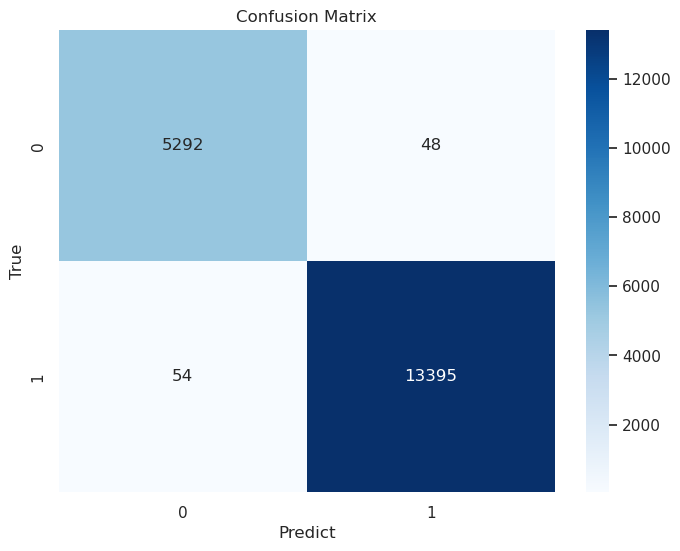

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_curve, auc, confusion_matrix
from sklearn.preprocessing import OneHotEncoder
import seaborn as sns

def train_gbdt_lr(X, y):
    gbc = GradientBoostingClassifier(n_estimators=3, random_state=2024, subsample=1, max_depth=2, min_samples_leaf=1, min_samples_split=2)
    gbc.fit(X, y)
    gbc_feats = gbc.apply(X).reshape(-1, 3)
    enc = OneHotEncoder().fit(gbc_feats)
    X_new = np.concatenate((X, enc.transform(gbc_feats).toarray()), axis=1)
    x_train, x_val, y_train, y_val = train_test_split(X_new, y, test_size=0.3, random_state=2024)  # 增加验证集比例
    lr = LogisticRegression(solver='lbfgs', random_state=2024)
    lr.fit(x_train, y_train)
    resu = lr.predict_proba(x_val)[:, 1]
    fpr, tpr, _ = roc_curve(y_val, resu)
    roc_auc = auc(fpr, tpr)
    return fpr, tpr, roc_auc, lr, x_train, x_val, y_train, y_val

fpr_gbdt_lr, tpr_gbdt_lr, auc_gbdt_lr, lr, x_train, x_val, y_train, y_val = train_gbdt_lr(X, y)

# ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr_gbdt_lr, tpr_gbdt_lr, 'm-.', label=f'GBDT+LR AUC = {auc_gbdt_lr:.2f}')
plt.title('GBDT + Logistic Regression ROC')
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

print("AUC：", auc_gbdt_lr)
# matrix
resu = lr.predict(x_val)  # validation
cm = confusion_matrix(y_val, resu)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predict')
plt.ylabel('True')
plt.show()



### Neural network ###

Now let's try another approach, defining functions for training a neural network classifier.
Firstly, it splits the dataset and uses 70% for training and 30% for validation, setting a random seed to ensure that the results are reproducible. Then it initialised a neural network containing a hidden layer of 10 neurons, set an upper limit of 50 iterations, a smaller L2 regularisation parameter, chose an adam optimiser and set the initial learning rate and random seed.

Iteration 1, loss = 0.15825576
Iteration 2, loss = 0.09077114
Iteration 3, loss = 0.08246579
Iteration 4, loss = 0.07374752
Iteration 5, loss = 0.06331418
Iteration 6, loss = 0.05588229
Iteration 7, loss = 0.05769199
Iteration 8, loss = 0.05666657
Iteration 9, loss = 0.07140546
Iteration 10, loss = 0.04436996
Iteration 11, loss = 0.04550791
Iteration 12, loss = 0.03345682
Iteration 13, loss = 0.03905470
Iteration 14, loss = 0.02159508
Iteration 15, loss = 0.03091457
Iteration 16, loss = 0.01791213
Iteration 17, loss = 0.01883731
Iteration 18, loss = 0.01645856
Iteration 19, loss = 0.01164013
Iteration 20, loss = 0.02223935
Iteration 21, loss = 0.01412863
Iteration 22, loss = 0.01464642
Iteration 23, loss = 0.01310135
Iteration 24, loss = 0.01191466
Iteration 25, loss = 0.00920345
Iteration 26, loss = 0.03125371
Iteration 27, loss = 0.01563166
Iteration 28, loss = 0.01669327
Iteration 29, loss = 0.01660801
Iteration 30, loss = 0.01255831
Iteration 31, loss = 0.01847265
Iteration 32, los

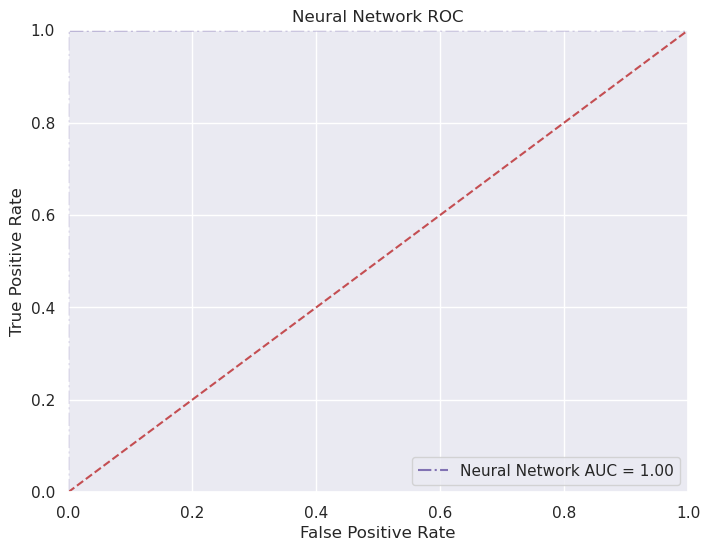

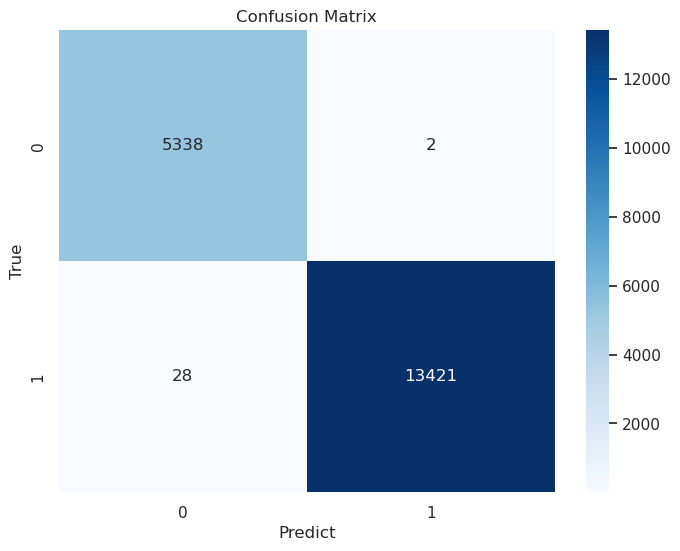

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import roc_curve, auc, confusion_matrix
from sklearn.datasets import make_classification


def train_neural_network(X, y):
    # split
    x_train, x_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=2024)
    # neural network
    nn = MLPClassifier(hidden_layer_sizes=(10,), max_iter=50, alpha=1e-4,
                       solver='adam', verbose=10, random_state=1,
                       learning_rate_init=.1)
    nn.fit(x_train, y_train)
    # predict
    resu = nn.predict_proba(x_val)[:, 1]
    fpr, tpr, _ = roc_curve(y_val, resu)
    roc_auc = auc(fpr, tpr)
    return fpr, tpr, roc_auc, nn, x_val, y_val

# result
fpr_nn, tpr_nn, auc_nn, nn, x_val, y_val = train_neural_network(X, y)

print("AUC：", auc_nn)

# ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr_nn, tpr_nn, 'm-.', label=f'Neural Network AUC = {auc_nn:.2f}')
plt.title('Neural Network ROC')
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

# matrix
resu = nn.predict(x_val)  # validation
cm = confusion_matrix(y_val, resu)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predict')
plt.ylabel('True')
plt.show()


The ROC curve shows an AUC (Area Under the Curve) value of 1.00, implying that the model has an excellent ability to differentiate between positive and negative categories, the number of negative categories that the model incorrectly predicts as positive is only 2, an error that can be ignored in the case of such a large dataset.

### Ramdom Forest ###

AUC： 0.9999996727824326


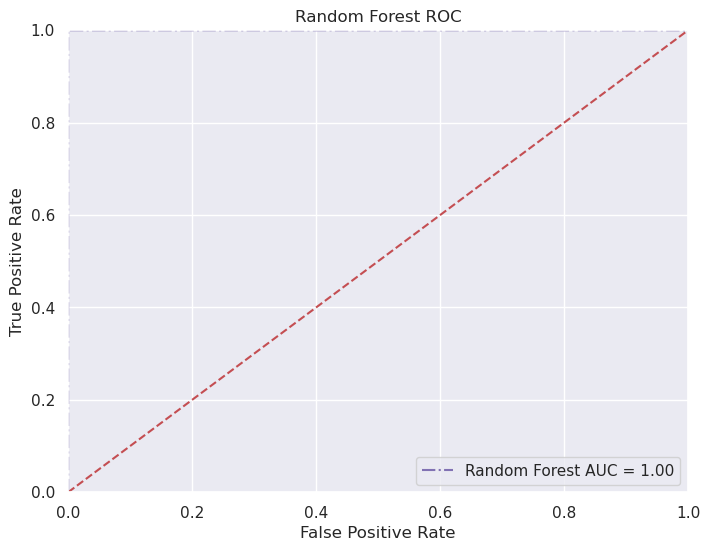

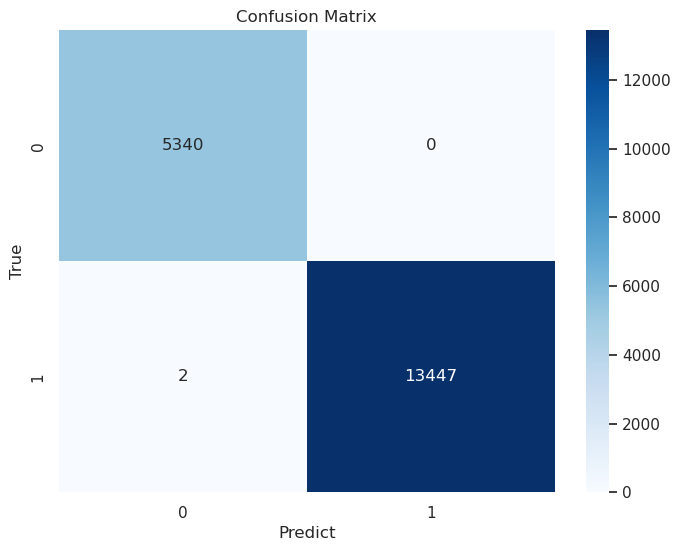

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc, confusion_matrix
from sklearn.datasets import make_classification



def train_random_forest(X, y):
    x_train, x_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=2024)
    rf = RandomForestClassifier(n_estimators=100, random_state=2024)
    rf.fit(x_train, y_train)
    resu = rf.predict_proba(x_val)[:, 1]
    fpr, tpr, _ = roc_curve(y_val, resu)
    roc_auc = auc(fpr, tpr)
    return fpr, tpr, roc_auc, rf, x_val, y_val

fpr_rf, tpr_rf, auc_rf, rf, x_val, y_val = train_random_forest(X, y)

# AUC
print("AUC：", auc_rf)

plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, 'm-.', label=f'Random Forest AUC = {auc_rf:.2f}')
plt.title('Random Forest ROC')
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

resu = rf.predict(x_val) 
cm = confusion_matrix(y_val, resu)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predict')
plt.ylabel('True')
plt.show()


In the end, we found Random Forest to be the most effective, with just two false positives in a test set of over 20,000 entries and a false alarm rate of zero.

In the smoke alarm system, the prediction results produce an impact that is closely related to the scenario. A scenario where the prediction is 1 (alarm triggered) and the actual is 0 (no fire), this is known as a false positive or false alarm. For smoke alarms, the usual bias is to accept false alarms rather than missed alarms because the consequences of a missed alarm (i.e., a fire that occurs and the alarm does not respond) can be catastrophic, including property damage, injuries, and deaths and fires.

 If a false alarm is confirmed, it can be reset without causing serious. However, if the rate of false positives is too high, it can lead to a "crying wolf" effect where people may ignore the alarm (Shah et al., 2019).

## Discussion

In this project, we have used logistic regression modelling to solve the smoke detection problem and tried methods to improve the prediction accuracy. Logistic regression is a commonly used algorithm in classification problems due to its simplicity and interpretability. The performance of the models is usually measured by Receiver Operating Characteristic Curve (ROC) and Area Under the Curve (AUC), and the results show that the models all have good classification ability, with Random Forest being the most capable.s.

However, there are some limitations. Firstly, logistic regression models may not be able to fully capture all of the complex non-linear relationships in the data, which may limit their performance in certain complex situations. For example, in urban environments where multiple factors come together, there may be interaction effects that are beyond the capabilities of traditional logistic regression. Second, the predictive accuracy of the model is affected by the quality of the dataset used. Although the data were collected under a variety of environmental conditions, insufficient or biased samples may affect the model's ability to generalifety.

Finally, we recommend further research on additional variables and possible interactions, especially in different urban contexts and environmental conditions. This will help us to better understand the performance of smoke detectors in different scenarios and provide a more accurate tool for the public safety field.


## Conclusion

In this study, logistic regression modelling was successfully applied on a smoke detector dataset in order to improve the accuracy of a fire warning system. Through the analysis of ROC curves, our model exhibits high AUC values, which demonstrates its effectiveness in distinguishing between the presence and absence of fire states. Importantly, the feature importance analysis of the model reveals the most critical variables for fire prediction, providing assistance in fire detection and prevention efforts.

Our study highlights the potential of machine learning models in improving the performance of fire detectors, especially in identifying and reducing false alarms. In urban environments, correct fire warnings not only save lives, but also reduce economic losses and waste of public resources due to false alarms. However, the study also shows that the draw between model complexity and interpretability needs to be considered in practical applications.

In the future, more complex algorithms, such as integrated learning or deep learning methods, can be considered and validated on a wider range of datasets. This will not only enhance the adaptability of the model in diverse environments, but also ensure its robustness in practical applications.

## Reference

Isrorudin, I., Maulana, A., Maryono, A., Gunawan, F. E. and Asrol, M. (2022) “An AN ANALYSIS OF EMERGENCY RESPONSE COSTS DUE TO FALSE ALARM SYSTEM”, JARES (Journal of Academic Research and Sciences), 7(1), pp. 1-10.

Kodur, V., Kumar, P., & Rafi, M. M. (2019). Fire hazard in buildings: review, assessment and strategies for improving fire safety. PSU research review, 4(1), 1-23.

Nesse, R. M. (2005). Natural selection and the regulation of defenses: A signal detection analysis of the smoke detector principle. Evolution and human behavior, 26(1), 88-105.

Cestari, L. A., Worrell, C., & Milke, J. A. (2005). Advanced fire detection algorithms using data from the home smoke detector project. Fire Safety Journal, 40(1), 1-28.

Ahrens, M. (2017). Trends and patterns of US fire loss. National Fire Protection Association (NFPA) report Google Scholar.

LaValley, M. P. (2008). Logistic regression. Circulation, 117(18), 2395-2399.

Breiman, L. (2001). Random forests. Machine learning, 45, 5-32.

Anderson, J. A. (1995). An introduction to neural networks. MIT press.

Zhang, Z., & Jung, C. (2020). GBDT-MO: gradient-boosted decision trees for multiple outputs. IEEE transactions on neural networks and learning systems, 32(7), 3156-3167.

Shah, R., Satam, P., Sayyed, M. A., & Salvi, P. (2019). Wireless smoke detector and fire alarm system. International Research Journal of Engineering and Technology (IRJET), 6(1), 1407-1412.
